In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
train_cleaned_df = pd.read_csv("./submission/train_cleaned.csv")
column_null_counts = train_cleaned_df.isnull().sum() *100/ len(train_cleaned_df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Series([], dtype: float64)

In [108]:
test_cleaned_df =pd.read_csv("./submission/test_cleaned.csv")
column_null_counts = test_cleaned_df.isnull().sum() *100/ len(test_cleaned_df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Garage Yr Blt    0.113895
dtype: float64

###  Examine and convert all ordinal columns to numerical values 

In [109]:
def create_ordinal_columns(df):
    #Lot Shape
    dict = {'Reg':0,'IR1':1 ,'IR2':2,'IR3':3 }
    df['ordinal_Lot Shape'] = df['ord_Lot Shape'].map(dict)

    #Utilities
    dict = {'AllPub':0,'NoSewr':1 ,'NoSeWa':2,'ELO':3 }
    df['ordinal_Utilities'] = df['ord_Utilities'].map(dict)

    #Land Slope
    dict = {'Gtl':0,'Mod':1 ,'Sev':2 }
    df['ordinal_Land Slope'] = df['ord_Land Slope'].map(dict)
    #Overall Cond
    #Overall Qual

    #Exter Qual ,Exter Cond ,smt Qual, Bsmt Cond, Heating QC, Kitchen Qual,Garage Qual,Garage Cond
    #Pool QC
    dict = {'N_A': 0,'Po':1,'Fa':2 ,'TA':3,'Gd':4,'Ex':5 }
    df['ordinal_Exter Qual'] = df['ord_Exter Qual'].map(dict)
    df['ordinal_Exter Cond'] = df['ord_Exter Cond'].map(dict)
    df['ordinal_Bsmt Qual'] = df['ord_Bsmt Qual'].map(dict)
    df['ordinal_Bsmt Cond'] = df['ord_Bsmt Cond'].map(dict)
    df['ordinal_Heating QC'] = df['ord_Heating QC'].map(dict)
    df['ordinal_Kitchen Qual'] = df['ord_Kitchen Qual'].map(dict)
    df['ordinal_Fireplace Qu'] = df['ord_Fireplace Qu'].map(dict)
    df['ordinal_Garage Qual'] = df['ord_Garage Qual'].map(dict)
    df['ordinal_Garage Cond'] = df['ord_Garage Cond'].map(dict)
    df['ordinal_Pool QC'] = df['ord_Pool QC'].map(dict)


    #Bsmt Exposure
    dict = {'N_A':0,'No':1 ,'Mn':2,'Av':3,'Gd':4 }
    df['ordinal_Bsmt Exposure'] = df['ord_Bsmt Exposure'].map(dict)

    #BsmtFin Type 1 ,BsmtFin Type 2
    dict = {'N_A':0,'Unf':1 ,'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5,'GLQ':6 }
    df['ordinal_BsmtFin Type 1'] = df['ord_BsmtFin Type 1'].map(dict)
    df['ordinal_BsmtFin Type 2'] = df['ord_BsmtFin Type 2'].map(dict)


    #Electrical
    dict = {'SBrkr':0,'FuseP':'1','FuseA':2 ,'FuseF':3,'Mix':4 }
    df['ordinal_Electrical'] = df['ord_Electrical'].map(dict)
    #

    #Functional
    #dict = {'':0,'':1 ,'':2,'':3 }
    #df['ordinal_Functional'] = df['ord_Functional'].map(dict)

    #Garage Finish
    dict = {'N_A':0,'Unf':1 ,'RFn':2,'Fin':3 }
    df['ordinal_Garage Finish'] = df['ord_Garage Finish'].map(dict)

    #Paved Drive
    dict = {'N':0,'P':1 ,'Y':2 }
    df['ordinal_Paved Drive'] = df['ord_Paved Drive'].map(dict)

    #Fence
    dict = {'N_A':0,'MnWw':1 ,'GdWo':2,'MnPrv':3,'GdPrv':4}
    df['ordinal_Fence'] = df['ord_Fence'].map(dict)

    df.rename(columns = {
        'ord_Overall Cond': 'ordinal_Overall Cond',
                'ord_Overall Qual': 'ordinal_Overall Qual',
    },inplace =True)

In [110]:
create_ordinal_columns(train_cleaned_df)
create_ordinal_columns(test_cleaned_df)

In [111]:

#Lot Shape
dict = {'Reg':0,'IR1':1 ,'IR2':2,'IR3':3 }
train_cleaned_df['ordinal_Lot Shape'] = train_cleaned_df['ord_Lot Shape'].map(dict)

#Utilities
dict = {'AllPub':0,'NoSewr':1 ,'NoSeWa':2,'ELO':3 }
train_cleaned_df['ordinal_Utilities'] = train_cleaned_df['ord_Utilities'].map(dict)
 
#Land Slope
dict = {'Gtl':0,'Mod':1 ,'Sev':2 }
train_cleaned_df['ordinal_Land Slope'] = train_cleaned_df['ord_Land Slope'].map(dict)
#Overall Cond
#Overall Qual

#Exter Qual ,Exter Cond ,smt Qual, Bsmt Cond, Heating QC, Kitchen Qual,Garage Qual,Garage Cond
#Pool QC
dict = {'N_A': 0,'Po':1,'Fa':2 ,'TA':3,'Gd':4,'Ex':5 }
train_cleaned_df['ordinal_Exter Qual'] = train_cleaned_df['ord_Exter Qual'].map(dict)
train_cleaned_df['ordinal_Exter Cond'] = train_cleaned_df['ord_Exter Cond'].map(dict)
train_cleaned_df['ordinal_Bsmt Qual'] = train_cleaned_df['ord_Bsmt Qual'].map(dict)
train_cleaned_df['ordinal_Bsmt Cond'] = train_cleaned_df['ord_Bsmt Cond'].map(dict)
train_cleaned_df['ordinal_Heating QC'] = train_cleaned_df['ord_Heating QC'].map(dict)
train_cleaned_df['ordinal_Kitchen Qual'] = train_cleaned_df['ord_Kitchen Qual'].map(dict)
train_cleaned_df['ordinal_Fireplace Qu'] = train_cleaned_df['ord_Fireplace Qu'].map(dict)
train_cleaned_df['ordinal_Garage Qual'] = train_cleaned_df['ord_Garage Qual'].map(dict)
train_cleaned_df['ordinal_Garage Cond'] = train_cleaned_df['ord_Garage Cond'].map(dict)
train_cleaned_df['ordinal_Pool QC'] = train_cleaned_df['ord_Pool QC'].map(dict)


#Bsmt Exposure
dict = {'N_A':0,'No':1 ,'Mn':2,'Av':3,'Gd':4 }
train_cleaned_df['ordinal_Bsmt Exposure'] = train_cleaned_df['ord_Bsmt Exposure'].map(dict)

#BsmtFin Type 1 ,BsmtFin Type 2
dict = {'N_A':0,'Unf':1 ,'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5,'GLQ':6 }
train_cleaned_df['ordinal_BsmtFin Type 1'] = train_cleaned_df['ord_BsmtFin Type 1'].map(dict)
train_cleaned_df['ordinal_BsmtFin Type 2'] = train_cleaned_df['ord_BsmtFin Type 2'].map(dict)


#Electrical
dict = {'SBrkr':0,'FuseP':'1','FuseA':2 ,'FuseF':3,'Mix':4 }
train_cleaned_df['ordinal_Electrical'] = train_cleaned_df['ord_Electrical'].map(dict)
#

#Functional
#dict = {'':0,'':1 ,'':2,'':3 }
#train_cleaned_df['ordinal_Functional'] = train_cleaned_df['ord_Functional'].map(dict)

#Garage Finish
dict = {'N_A':0,'Unf':1 ,'RFn':2,'Fin':3 }
train_cleaned_df['ordinal_Garage Finish'] = train_cleaned_df['ord_Garage Finish'].map(dict)

#Paved Drive
dict = {'N':0,'P':1 ,'Y':2 }
train_cleaned_df['ordinal_Paved Drive'] = train_cleaned_df['ord_Paved Drive'].map(dict)

#Fence
dict = {'N_A':0,'MnWw':1 ,'GdWo':2,'MnPrv':3,'GdPrv':4}
train_cleaned_df['ordinal_Fence'] = train_cleaned_df['ord_Fence'].map(dict)

train_cleaned_df.rename(columns = {
    'ord_Overall Cond': 'ordinal_Overall Cond',
            'ord_Overall Qual': 'ordinal_Overall Qual',
},inplace =True)

In [112]:
train_cleaned_df[train_cleaned_df.columns[train_cleaned_df.columns.str.startswith('ordinal')]].dtypes
#train_cleaned_df['ord_Overall Qual']

ordinal_Overall Qual       int64
ordinal_Overall Cond       int64
ordinal_Lot Shape          int64
ordinal_Utilities          int64
ordinal_Land Slope         int64
ordinal_Exter Qual         int64
ordinal_Exter Cond         int64
ordinal_Bsmt Qual          int64
ordinal_Bsmt Cond          int64
ordinal_Heating QC         int64
ordinal_Kitchen Qual       int64
ordinal_Fireplace Qu       int64
ordinal_Garage Qual        int64
ordinal_Garage Cond        int64
ordinal_Pool QC            int64
ordinal_Bsmt Exposure      int64
ordinal_BsmtFin Type 1     int64
ordinal_BsmtFin Type 2     int64
ordinal_Electrical        object
ordinal_Garage Finish      int64
ordinal_Paved Drive        int64
ordinal_Fence              int64
dtype: object

In [113]:
test_cleaned_df[test_cleaned_df.columns[test_cleaned_df.columns.str.startswith('ordinal')]].dtypes
#train_cleaned_df['ord_Overall Qual']

ordinal_Overall Qual       int64
ordinal_Overall Cond       int64
ordinal_Lot Shape          int64
ordinal_Utilities          int64
ordinal_Land Slope         int64
ordinal_Exter Qual         int64
ordinal_Exter Cond         int64
ordinal_Bsmt Qual          int64
ordinal_Bsmt Cond          int64
ordinal_Heating QC         int64
ordinal_Kitchen Qual       int64
ordinal_Fireplace Qu       int64
ordinal_Garage Qual        int64
ordinal_Garage Cond        int64
ordinal_Pool QC            int64
ordinal_Bsmt Exposure      int64
ordinal_BsmtFin Type 1     int64
ordinal_BsmtFin Type 2     int64
ordinal_Electrical        object
ordinal_Garage Finish      int64
ordinal_Paved Drive        int64
ordinal_Fence              int64
dtype: object

In [114]:
test_cleaned_df['ordinal_Bsmt Exposure'] =test_cleaned_df['ordinal_Bsmt Exposure'].astype('int64')
test_cleaned_df['ordinal_BsmtFin Type 1'] =test_cleaned_df['ordinal_BsmtFin Type 1'].astype('int64')
test_cleaned_df['ordinal_BsmtFin Type 2'] =test_cleaned_df['ordinal_BsmtFin Type 2'].astype('int64')
test_cleaned_df['ordinal_Fence'] =test_cleaned_df['ordinal_Fence'].astype('int64')
test_cleaned_df['ordinal_Electrical'] =test_cleaned_df['ordinal_Electrical'].astype('int64')

In [115]:
 test_cleaned_df['ordinal_Garage Qual'].value_counts()
test_cleaned_df['ordinal_Garage Qual'].isnull().sum()
# train_cleaned_df['ord_Electrical'].sort_values()

0

In [116]:
#train_cleaned_df['ordinal_Bsmt Exposure'] =train_cleaned_df['ordinal_Bsmt Exposure'].astype('int32')
#train_cleaned_df['ordinal_BsmtFin Type 1'] =train_cleaned_df['ordinal_BsmtFin Type 1'].astype('int32')
#train_cleaned_df['ordinal_BsmtFin Type 2'] =train_cleaned_df['ordinal_BsmtFin Type 2'].astype('int32')
#train_cleaned_df['ordinal_Fence'] =train_cleaned_df['ordinal_Fence'].astype('int32')
train_cleaned_df['ordinal_Electrical'] =train_cleaned_df['ordinal_Electrical'].astype('int64')

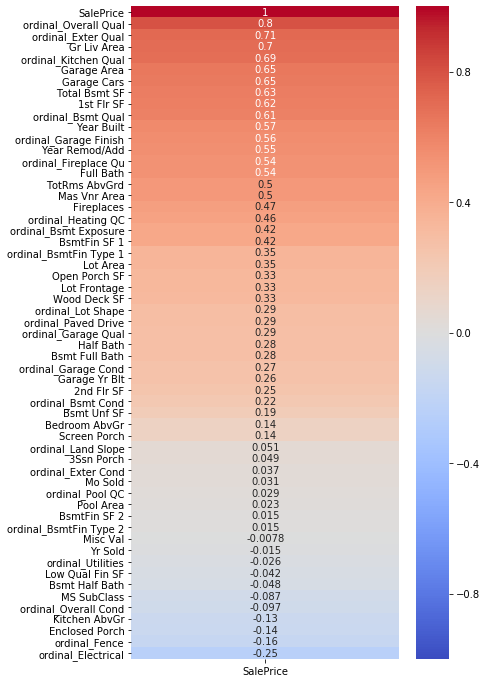

In [117]:
 apps_core = train_cleaned_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
 plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
 sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True)

### Section 6 Save cleaned data frame  to a file> <a id= 'save_dataframe'></a>

In [118]:
#cols_to_transform = [ 'a', 'list', 'of', 'categorical', 'column', 'names' ]
#df_with_dummies = pd.get_dummies( columns = cols_to_transform )
train_cleaned_df.to_csv("./submission/train_cleaned_ord.csv",index=False)
test_cleaned_df.to_csv("./submission/test_cleaned_ord.csv",index=False)

In [119]:
###  Hot encode   Nominal variable to

###### . References
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02